In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [76]:
from plot_prop import *
from plot_projections import *
from plot_param import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from new_projections import *
from parameters import *
from output_xfoil import *

In [85]:
import csv
import sys

In [4]:
propeller = pd.read_csv('propeller_data.csv')

In [5]:
positions = [40, 70]

In [6]:
#####################################################################################################
##########################            PRE-PROCESSING            #####################################
#####################################################################################################
propeller_coords, vect_length, vect_out, vect_side = prepare_propeller(propeller)

dmiddle, dlowest, dhighest   = d_blade(vect_length, propeller_coords)                     #d of plan ax+by+cx+d = 0
upper_blade, lower_blade     = blade_alone(propeller_coords, vect_length, dmiddle)        #points of each blades

In [7]:
planes = get_planes_xfoil(upper_blade, dmiddle, dhighest, vect_length, positions) #get equations of planes for projection

In [8]:
all_plane_points = get_points(upper_blade, planes)                   #get points used for each projection

Points of plane 1
Points of plane 2


In [9]:
#####################################################################################################
##########################              PROJECTION              #####################################
#####################################################################################################
right_param, left_param, right_pts, left_pts = get_all_projections(planes, all_plane_points)

10
13
7
10


In [60]:
x_list, y_right_list, y_left_list, rm = get_generated_points_xfoil(right_param, left_param, right_pts, left_pts)

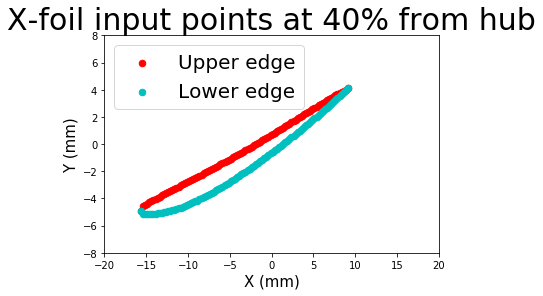

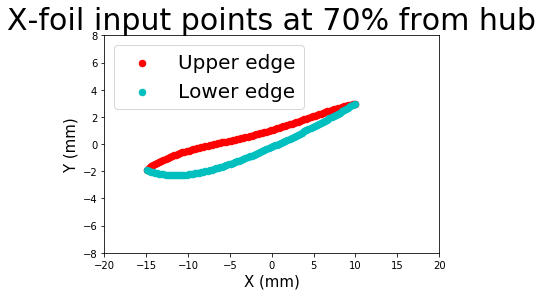

In [74]:
for i in range(len(all_plane_points) - rm):
    plot_xfoil( x_list[i], y_right_list[i], y_left_list[i], positions[i] )

In [63]:
#blade_twist = xfoil_get_blade_twist(x, y_right_list, y_left_list)
blade_twist = get_blade_twist(x_list, y_right_list, y_left_list)

In [64]:
blade_twist

[20.00224912082078, 11.031522912024245]

In [85]:
x_r_rotated, y_r_rotated, x_l_rotated, y_l_rotated = align_aerofoil(x_list, y_right_list, y_left_list, blade_twist)

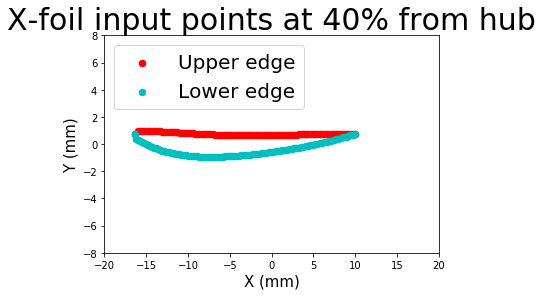

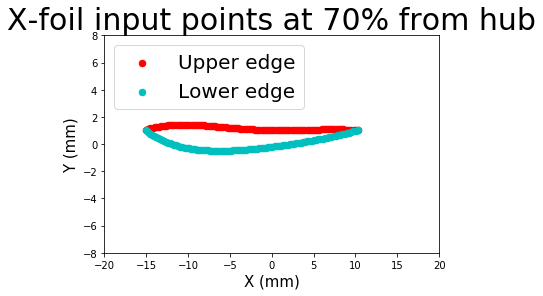

In [86]:
for i in range(len(all_plane_points) - rm):
    plot_xfoil_aligned(x_r_rotated[i], y_r_rotated[i], x_l_rotated[i], y_l_rotated[i], positions[i])

In [88]:
for i, pos in enumerate(positions):
    xfoil_input_data(x_r_rotated[i], y_right_list[i], x_l_rotated[i], y_left_list[i], pos)